# MNIST PROJECT

## FINDING HANDWRITTEN DIGITS USING TENSORFLOW

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import idx2numpy

In [2]:
!nvidia-smi

Sat Feb  8 11:15:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 571.96                 Driver Version: 571.96         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   45C    P3             12W /   35W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
#LOADING THE DATA

In [4]:
X_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
X_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [5]:
#ONE HOT ENCODE THE LABELS

In [6]:
y_train = to_categorical(y_train, 10)

In [7]:
y_test = to_categorical(y_test, 10)

In [8]:
#NORMALISING THE DATA

In [9]:
X_train = X_train.astype('float32')/255

In [10]:
X_test = X_test.astype('float32')/255

In [11]:
#RESHAPING THE DATA

In [12]:
X_train = X_train.reshape(X_train.shape[0], -1)

In [13]:
X_test = X_test.reshape(X_test.shape[0], -1)

In [14]:
#CREATING BASIC NEURAL NETWORK

In [15]:
model = Sequential([Input(shape = (784,)),
                          Dense(64, activation = 'relu'),
                          Dense(64, activation = 'relu'),
                          Dense(10, activation = 'softmax')
                         ])

In [16]:
#COMPILING THE MODEL

In [17]:
model.compile(optimizer = Adam(), 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:
#TRAINING THE MODEL

In [19]:
history = model.fit(X_train, y_train, batch_size = 128, 
                   epochs = 19, 
                   validation_split = 0.1)

Epoch 1/19
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7714 - loss: 0.7757 - val_accuracy: 0.9518 - val_loss: 0.1783
Epoch 2/19
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9421 - loss: 0.1984 - val_accuracy: 0.9632 - val_loss: 0.1315
Epoch 3/19
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9580 - loss: 0.1428 - val_accuracy: 0.9647 - val_loss: 0.1183
Epoch 4/19
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.1089 - val_accuracy: 0.9703 - val_loss: 0.1034
Epoch 5/19
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0899 - val_accuracy: 0.9710 - val_loss: 0.1005
Epoch 6/19
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9780 - loss: 0.0750 - val_accuracy: 0.9715 - val_loss: 0.0990
Epoch 7/19
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0643 - val_accuracy: 0.9762 - val_loss: 0.0883
Epoch 8/19
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0526 - val_accuracy: 0.

In [20]:
#EVALUATING THE MODEL WITH TEST SET

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy: .4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9655 - loss: 0.1348 
Test Accuracy:  0.9720


## PLOTTING GRAPHS

In [22]:
import matplotlib.pyplot as plt

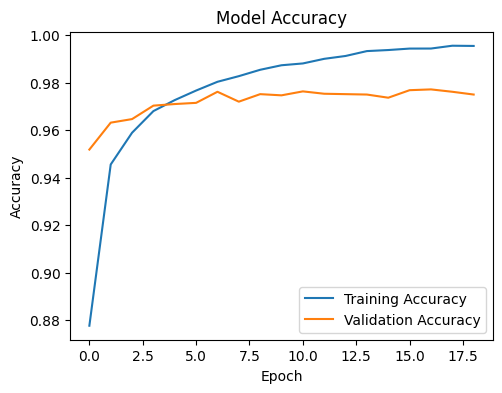

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

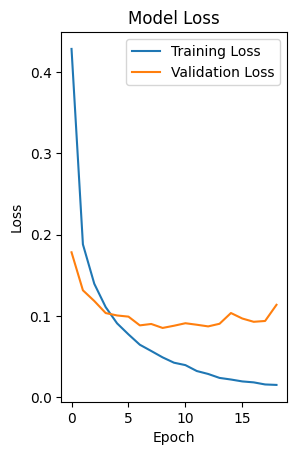

In [24]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
#SAVING THE MODEL FOR FUTURE USE

In [27]:
model.save('mnist_model.keras')